<a href="https://colab.research.google.com/github/146790g/BreakHis-VGG16/blob/master/BreakHis_VGG16_6_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 深層学習 VGG16モデルを用いた乳がん染色画像（BreakHis）の解析
#（その６ : 特徴量に基づくロジステック回帰モデルによる分類 ）
# Deep Learning for Magnification Independent Breast Cancer Histopathology

<br>

# Logistic Regression Classification Based on Principal Components of Feature Data which was extracted by VGG16 Model

<br>


<h2>対象データは、こちらをクリック ☞　</>
<a href='https://www.kaggle.com/ambarish/breakhis'>Kaggle BreakHis Data</a>

４つのMagnification levelのデータをすべて合算して、解析する

<br>

## 4 Magnification Levels: ×40, ×100, ×200, ×400


During analysis and annotation, pathologists starts by identifying ROIs in
the lowest magnification level slide (×40), then dives deeper in the latter using higher magnification levels (×100, ×200) until having a profound insight
(×400). 

<br>

## データ数 の概要

・Training Data: 5026 images <br>
  -- Benign Data: 1472 images <br>
  -- Mallignant Data: 3554 images 

・Validation Data: 2904 images <br>
  -- Benign Data: 1008 images <br>
  -- Mallignant Data:1896 images <br>

## Data Set Details by Magnification levels.

 ×40 : <br>
×100 : <br>
×200 : <br>
×400 : <br>

In [ ]:
%tensorflow_version 2.x

In [ ]:
%pwd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls -lh '/content/gdrive/My Drive/Colab Notebooks/BreakHis/data'

total 8.0K
drwx------ 2 root root 4.0K Jul 21 03:42 train
drwx------ 2 root root 4.0K Jul 27 01:49 validation


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import MeanShift, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import mixture
from sklearn.cluster import MeanShift, estimate_bandwidth
import pickle
import pandas as pd
import numpy as np

import numpy as np
from scipy import interp
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt

#sklearn 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder



# 第８章 特徴データに基づくロジスティック回帰モデルによる分類　


### 特徴量データを読み込む

In [ ]:
train_data_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/data/train' # 訓練データのフォルダー
validation_data_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/data/validation' # テストデータのフォルダー
result_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/results'        # VGG19の出力結果を保存するフォルダー
test_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/test'
    

import os
import pickle

result_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/results'        # VGG16の出力結果を保存するフォルダー


with open(os.path.join(result_dir,'vgg16feature.pickle'),'rb') as web:
  X=pickle.load(web)



l1 = [0] * 78
l2= [1]*94
label=l1+l2

y=np.array(label)

print(len(y))
print(X.shape)

X.head()



172
(172, 256)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,1.433194,0.237343,0.0,0.000000,0.285511,0.000000,1.551462,1.584471,0.625109,0.479136,0.020791,0.0,1.102332,0.188140,0.000000,0.00000,0.000000,0.0,0.000000,0.396689,1.844249,0.0,0.0,0.026968,0.565343,1.454684,0.431100,0.290944,0.215467,0.952217,1.556580,0.000000,0.111209,0.158797,0.163824,0.0,0.05042,1.436597,0.528508,0.026793,...,0.0,0.0,0.000000,0.000000,0.105006,0.577345,2.113621,0.000000,0.000000,0.0,0.000000,2.309258,0.000000,0.0,0.076591,1.589648,0.000000,0.0,0.105026,0.235231,1.247267,0.146883,0.0,1.960971,0.072056,1.595739,0.214662,0.000000,0.0,0.000000,0.206624,1.873543,0.568496,0.428319,1.357321,2.048620,0.124101,0.433003,0.365921,0.0
1,1.009185,0.000000,0.0,0.689157,0.000000,0.830676,0.789047,0.784227,0.083634,0.000000,0.306518,0.0,0.585309,0.338991,0.572953,0.54383,0.877386,0.0,0.434742,0.000000,1.328300,0.0,0.0,0.285479,0.000000,1.054899,0.000000,0.000000,0.716150,0.826995,1.195088,0.241468,0.000000,0.987432,0.415407,0.0,0.00000,0.649006,0.000000,0.000000,...,0.0,0.0,0.418885,0.007660,0.090456,0.000000,1.321693,0.686597,0.626664,0.0,0.869008,1.437314,0.235521,0.0,0.000000,1.201078,1.047137,0.0,0.537235,0.000000,0.541292,0.171941,0.0,0.724426,0.206602,0.902463,0.000000,0.162006,0.0,0.684559,0.000000,0.948754,0.000000,0.000000,0.613472,1.218000,0.280792,0.000000,0.000000,0.0
2,0.289563,0.000000,0.0,0.000000,0.736669,0.107959,0.141006,0.000000,0.671071,0.000000,0.610026,0.0,0.000000,0.566219,0.405849,0.00000,0.326723,0.0,0.000000,0.418382,0.611495,0.0,0.0,0.000000,0.000000,0.000000,0.428842,0.405021,0.390679,0.000000,0.377403,0.152265,0.000000,1.320356,0.636156,0.0,0.00000,0.075839,0.422961,0.153457,...,0.0,0.0,0.000000,0.000000,0.532768,0.420679,0.647546,0.000000,0.465920,0.0,0.180141,1.283007,0.312222,0.0,0.000000,0.481541,0.420336,0.0,0.872057,0.472561,0.000000,0.000000,0.0,0.123560,0.772115,0.000000,0.328423,0.842926,0.0,0.136258,0.472292,0.786054,0.613113,0.335140,0.194091,0.505944,0.175480,0.643338,0.717072,0.0
3,0.583612,0.000000,0.0,0.263637,0.889500,0.909541,0.600619,0.199971,0.882761,0.000000,0.622806,0.0,0.000000,0.781961,0.526079,0.00000,0.724968,0.0,0.353456,0.292023,1.017933,0.0,0.0,0.000000,0.000000,0.255840,0.708143,0.895666,0.658374,0.074447,0.746882,0.245530,0.000000,1.151092,0.578391,0.0,0.00000,0.431055,0.715218,0.501422,...,0.0,0.0,0.000000,0.870980,0.836086,0.579863,0.890332,0.000000,0.619595,0.0,0.000000,1.597802,0.461703,0.0,0.000000,0.790383,1.056592,0.0,1.000560,0.464419,0.000000,0.000000,0.0,0.661468,0.831154,0.454522,0.954082,0.706323,0.0,0.118271,0.684017,1.139560,0.733019,0.774769,0.544980,0.942081,0.922542,0.755323,0.765121,0.0
4,0.000000,0.000000,0.0,0.096608,1.394846,0.527889,0.000000,0.000000,1.469433,0.000000,1.012401,0.0,0.000000,1.336541,1.015579,0.00000,1.284347,0.0,0.410253,1.282213,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.194283,0.747365,0.638556,0.000000,0.000000,0.681107,0.000000,1.643979,1.310159,0.0,0.00000,0.000000,1.625270,0.838343,...,0.0,0.0,0.000000,0.589039,1.291207,1.415172,0.000000,0.000000,0.947611,0.0,0.313818,0.587444,0.929679,0.0,0.000000,0.000000,1.157831,0.0,1.435006,1.183660,0.000000,0.000000,0.0,0.000000,1.044837,0.000000,1.050298,1.385072,0.0,0.485798,1.076328,0.089373,1.485117,1.599277,0.000000,0.000000,0.883193,1.501190,1.697194,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.20)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(137, 256)
(137,)
(35, 256)
(35,)


## データを正規化して、主成分分析を行い、その主成分に基づいてロジスティック回帰モデルによる分類を行う
## 主成分は、第１主成分から第5主成分までを算出して、それらに基づいてロジスティック回帰モデルを適用する

In [ ]:
#logistic Regression

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        LogisticRegression(random_state=1))


pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.914


## Accuracyは、91.4%であった。

## 混合行列を作成する

[[14  2]
 [ 1 18]]


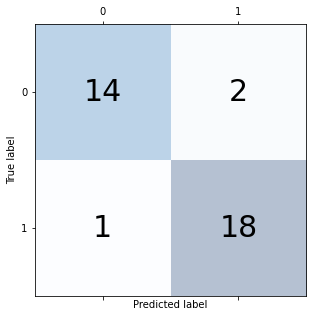

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)


fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=30)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

## Accuracy : 91.4%
## Recall: 94.7%
## F1 : 92.3 %

# Accuracy : 乳癌の患者を正しく乳癌と判定し、かつ、正常の患者を正常と正しく判定できる確率
# Recall: 乳癌の患者を正しく乳癌と判定できる確率


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))


Accuracy: 0.914
Recall: 0.947
F1: 0.923
